In [1]:
import numpy as np
import torch

data = np.loadtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/Semion/semeion.data')

X = data[:, :256]  # First 256 columns are the pixel features
Y = data[:, 256:]  # Last 10 columns represent the one-hot encoded digit labels

# Convert one-hot encoded labels to class labels (digits 0 to 9)
Y_labels = np.argmax(Y, axis=1)

# Function to split data into training and testing sets
def split_data(X, Y, test_size=0.2, random_state=None):
    np.random.seed(random_state) 
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices
    
    test_size = int(test_size * X.shape[0])
    train_indices, test_indices = indices[:-test_size], indices[-test_size:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = split_data(X, Y_labels, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long) 
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)
print("Training data shape:", X_train_tensor.shape)
print("Training labels shape:", Y_train_tensor.shape)
print("Test data shape:", X_test_tensor.shape)
print("Test labels shape:", Y_test_tensor.shape)

Training data shape: torch.Size([1275, 256])
Training labels shape: torch.Size([1275])
Test data shape: torch.Size([318, 256])
Test labels shape: torch.Size([318])


In [2]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def train_model(model, X_train, Y_train, criterion, optimizer, epochs):
    loss_history = []  

    for epoch in range(epochs):
        model.train()

        # Forward pass: Compute predicted Y by passing X to the model
        outputs = model(X_train)

        # Compute the loss (cross-entropy loss)
        loss = criterion(outputs, Y_train)

        # Backward pass: Compute gradients
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Backpropagation

        # Update parameters
        optimizer.step()

        # Store the loss for plotting
        loss_history.append(loss.item())

        # Print loss every 10 epochs
        if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

    return loss_history

def compute_accuracy(model, X_test, Y_test):
    model.eval() 
    with torch.no_grad():  
        outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == Y_test).sum().item()
    total = Y_test.size(0)
    accuracy = correct / total * 100 
    return accuracy

def plot_loss(loss_history, epochs):
    plt.plot(range(epochs), loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

Epoch 100/200, Loss: 0.7398169636726379
Epoch 200/200, Loss: 0.2987993061542511


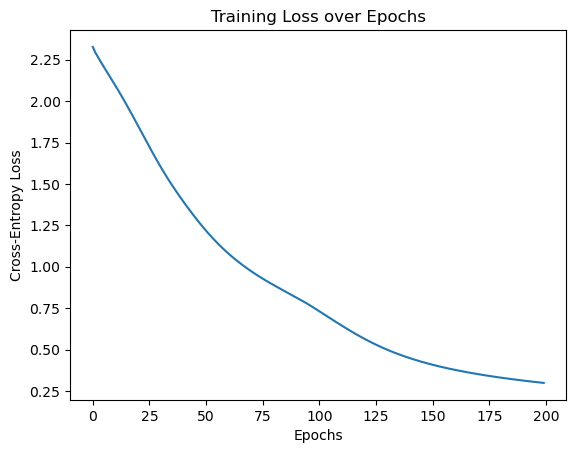

Accuracy on the test set: 88.05%


In [3]:
#MLP model with 5 neurons in the hidden layer
class MLPModel5(nn.Module):
    def __init__(self):
        super(MLPModel5, self).__init__()
        self.hidden = nn.Linear(256, 5)  # Input: 256 features, Hidden layer: 5 neurons
        self.relu = nn.ReLU()            # ReLU activation for the hidden layer
        self.output = nn.Linear(5, 10)   # Output layer: 10 neurons (for digits 0–9)

    def forward(self, x):
        # Forward pass
        x = self.hidden(x)  
        x = self.relu(x)    
        x = self.output(x) 
        return x

model_5 = MLPModel5()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_5.parameters(), lr=0.19)

# Set the number of epochs
epochs = 200

# Train the model with 5 neurons in the hidden layer
loss_history_5 = train_model(model_5, X_train_tensor, Y_train_tensor, criterion, optimizer, epochs)

# Plot the loss
plot_loss(loss_history_5, epochs)

# Compute the accuracy on the test set
test_accuracy_5 = compute_accuracy(model_5, X_test_tensor, Y_test_tensor)
print(f'Accuracy on the test set: {test_accuracy_5:.2f}%')

Epoch 100/100, Loss: 0.19935335218906403


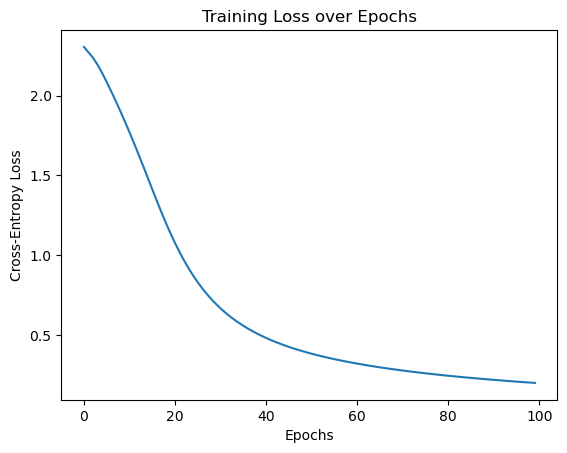

Accuracy on the test set: 91.19%


In [4]:
#MLP model with 10 neurons in the hidden layer
class MLPModel10(nn.Module):
    def __init__(self):
        super(MLPModel10, self).__init__()
        # Define layers
        self.hidden = nn.Linear(256, 10)  # Input: 256 features, Hidden layer: 10 neurons
        self.relu = nn.ReLU()             # ReLU activation for the hidden layer
        self.output = nn.Linear(10, 10)   # Output layer: 10 neurons (for digits 0–9)

    def forward(self, x):
        # Forward pass
        x = self.hidden(x)  
        x = self.relu(x)   
        x = self.output(x)  
        return x

def reinitialize_parameters(model):
    for layer in model.children():
        if isinstance(layer, nn.Linear):
            nn.init.uniform_(layer.weight, -1/np.sqrt(layer.in_features), 1/np.sqrt(layer.in_features))
            nn.init.zeros_(layer.bias)

model_10 = MLPModel10()  
reinitialize_parameters(model_10)  

# Reinitialize the optimizer for the new model
optimizer = optim.SGD(model_10.parameters(), lr=0.26)

# Set the number of epochs
epochs = 100

# Train the model with 10 neurons in the hidden layer
loss_model2 = train_model(model_10, X_train_tensor, Y_train_tensor, criterion, optimizer, epochs)

# Plot the loss
plot_loss(loss_model2, epochs)

# Compute the accuracy on the test set
model2_accuracy = compute_accuracy(model_10, X_test_tensor, Y_test_tensor)
print(f'Accuracy on the test set: {model2_accuracy:.2f}%')

Epoch 100/600, Loss: 1.8526910543441772
Epoch 200/600, Loss: 0.8993801474571228
Epoch 300/600, Loss: 0.5459235310554504
Epoch 400/600, Loss: 0.3633173704147339
Epoch 500/600, Loss: 0.24779893457889557
Epoch 600/600, Loss: 0.18389855325222015


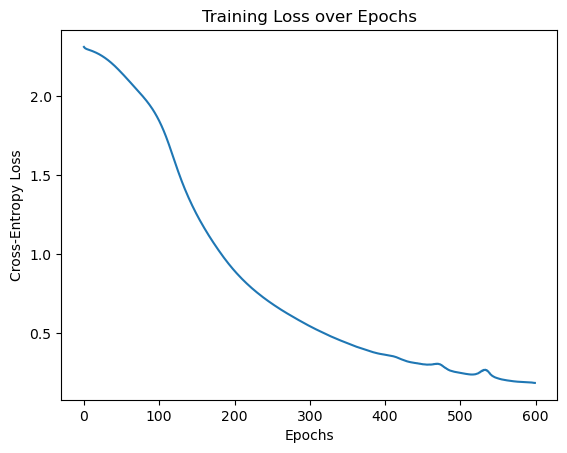

Accuracy on the test set: 82.39%


In [25]:
# Define the MLP model with 2 hidden layers, each with 5 neurons
class MLPModelTwoHiddenLayers(nn.Module):
    def __init__(self):
        super(MLPModelTwoHiddenLayers, self).__init__()
        # Define layers
        self.hidden1 = nn.Linear(256, 5)  # First hidden layer: 5 neurons
        self.relu1 = nn.ReLU()            # ReLU activation for the first hidden layer
        self.hidden2 = nn.Linear(5, 5)    # Second hidden layer: 5 neurons
        self.relu2 = nn.ReLU()            # ReLU activation for the second hidden layer
        self.output = nn.Linear(5, 10)    # Output layer: 10 neurons (for digits 0–9)

    def forward(self, x):
        # Forward pass
        x = self.hidden1(x)
        x = self.relu1(x)    
        x = self.hidden2(x)  
        x = self.relu2(x)    
        x = self.output(x)   
        return x
def reinitialize_parameters(model):
    for layer in model.children():
        if isinstance(layer, nn.Linear):
            nn.init.uniform_(layer.weight, -1/np.sqrt(layer.in_features), 1/np.sqrt(layer.in_features))
            nn.init.zeros_(layer.bias)


model_three = MLPModelTwoHiddenLayers()
reinitialize_parameters(model_three)  # Reinitialize the parameters

# Reinitialize the optimizer for the new model
optimizer = optim.SGD(model_three.parameters(), lr=0.131)

# Set the number of epochs
epochs =600

# Train the model with 2 hidden layers, each with 5 neurons
loss_model3 = train_model(model_three, X_train_tensor, Y_train_tensor, criterion, optimizer, epochs)

# Plot the loss
plot_loss(loss_model3, epochs)

# Compute the accuracy on the test set
model3_accuracy = compute_accuracy(model_three, X_test_tensor, Y_test_tensor)
print(f'Accuracy on the test set: {model3_accuracy:.2f}%')

In [6]:
#MODEL with 5 neurons and 1 hidden layer converges at around 60 epochs
#MODEL with 10 neurons and 1 hidden layer converges at around 30 epochs
#MODEL with 5 neurons at 2 hidden layer converges at arouund 200 epochs